In [1]:
from scipy.fft import fft, rfft, rfftfreq
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.integrate as integrate

In [2]:
#function to calculate roughness
def get_roughness(h,d,k_lims):
    diffs = np.diff(d)
    sample_space = np.abs(np.mean(diffs))
    n = len(d)
    k = rfftfreq(n, sample_space)
    yf = rfft(h) * sample_space
    power = np.square(abs(yf))
    psd = power*(k[1]-k[0])
    psd = psd[(k>k_lims[0]) & (k<k_lims[1])]
    k = k[(k>k_lims[0]) & (k<k_lims[1])]
    if len(psd)>1:
        int_psd = np.max(integrate.cumulative_trapezoid(psd,k))
        R = np.sqrt(int_psd)
    else:
        R=np.nan
    return R,psd,k

#function to make surface crevasses
def make_surface_crevasse(h_c,w_c,s_c,d):
    v = np.zeros((len(d)))
    v_check = []
    for mod in np.mod(d,s_c):
        if mod in range(0,int(w_c),1):
            v_check.append(True)
        else:
            v_check.append(False)
    v[v_check] = -h_c
    return v

#function to make surface rifts (taking into account isostasy)
def make_surface_rift(h_i,w_c,s_c,d):
    rho_i, rho_w = 910, 1000
    h_w = h_i - (h_i*rho_i)/rho_w
    v = np.zeros((len(d)))
    v_check = []
    for mod in np.mod(d,s_c):
        if mod in range(0,int(w_c),1):
            v_check.append(True)
        else:
            v_check.append(False)
    v[v_check] = -h_w
    return v

#function to make a surface with a single rift
def make_single_rift(h_i,w_c,d):
    rho_i, rho_w = 910, 1000
    h_w = h_i - (h_i*rho_i)/rho_w
    v = np.zeros((len(d)))
    v_check = []
    for i in range(len(v)):
        if d[i] in range(d[int(np.floor(len(d)/2))]-int(np.floor(w_c)/2),d[int(np.floor(len(d)/2))]+int(np.floor(w_c)/2),1):
            v_check.append(True)
        else:
            v_check.append(False)
    v[v_check] = -h_w
    return v

In [3]:
h_i = 1000
w_c = 10
n = 200
s = make_single_rift(h_i,w_c,np.arange(0,100,1))

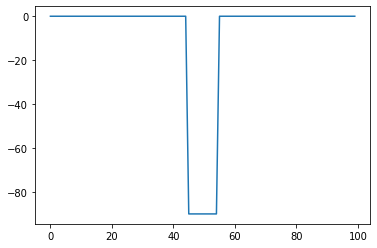

In [4]:
plt.plot(s)

In [6]:
#w_c held constant
w_c = 10
d = np.arange(1,5000,1)
h_i_range = np.arange(100,1100,10)
s_c_range = np.floor(np.logspace(np.log10(2*w_c),3.75,100))
r_values = np.zeros((len(h_i_range),len(s_c_range)))

for i,h_i in enumerate(h_i_range):
    for j,s_c in enumerate(s_c_range):
        v = make_surface_rift(h_i,w_c,s_c,d)
        r,psd,k = get_roughness(v,d,[0,1000])
        r_values[i,j] = r

Text(0, 0.5, 'Surface Elevation (m)')

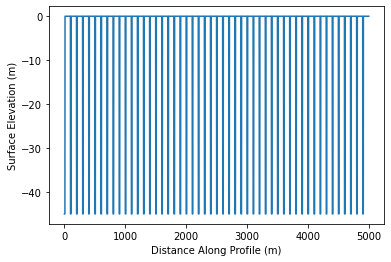

In [12]:
m = make_surface_rift(500,10,100,d)
plt.plot(m)
plt.xlabel('Distance Along Profile (m)')
plt.ylabel('Surface Elevation (m)')

Text(0, 0.5, 'Surface Elevation (m)')

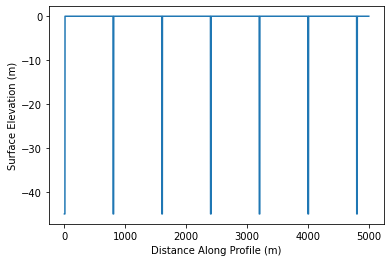

In [13]:
m = make_surface_rift(500,10,800,d)
plt.plot(m)
plt.xlabel('Distance Along Profile (m)')
plt.ylabel('Surface Elevation (m)')

<ipython-input-7-608e3694ddb8>:5: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(cplot,fraction=0.03, pad=0.04)


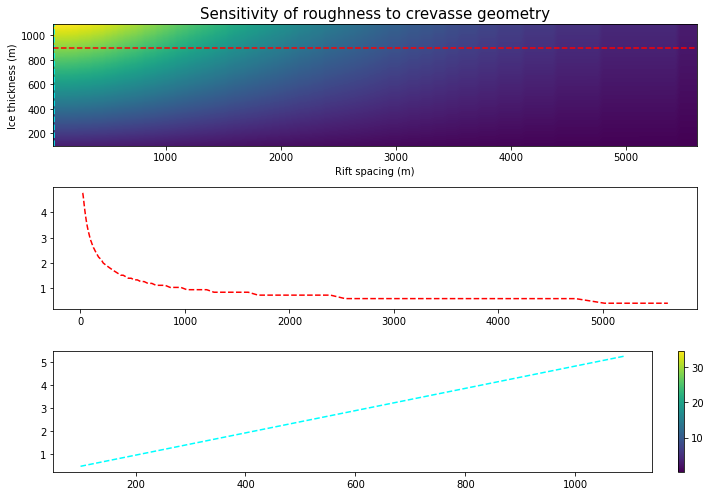

In [7]:
#plot all possible depth/spacing combinations, roughness on z axis
fig,ax = plt.subplots(3,1,figsize=(10,7))
ax[0].set_title("Sensitivity of roughness to crevasse geometry",fontsize=15)
extent = [s_c_range[0],s_c_range[-1],h_i_range[0],h_i_range[-1]]
cplot = ax[0].imshow(r_values, origin='lower', extent=extent,aspect="auto")
plt.colorbar(cplot,fraction=0.03, pad=0.04)
ax[0].set_xlabel("Rift spacing (m)")
ax[0].set_ylabel("Ice thickness (m)")

# plot some specific lines
spacing = s_c_range[5]
depth = h_i_range[80]
ax[0].vlines(spacing,h_i_range[0],h_i_range[-1],colors='cyan',linestyle="--")
ax[0].hlines(depth,s_c_range[0],s_c_range[-1],colors='r',linestyle="--")
ax[1].plot(s_c_range,r_values[np.where(s_c_range == spacing)[0][0],:],c='r',linestyle="--")
ax[2].plot(h_i_range,r_values[:,np.where(h_i_range == depth)[0][0]],c='cyan',linestyle="--")
plt.tight_layout()

Text(0.5, 0, 'Roughness (m)')

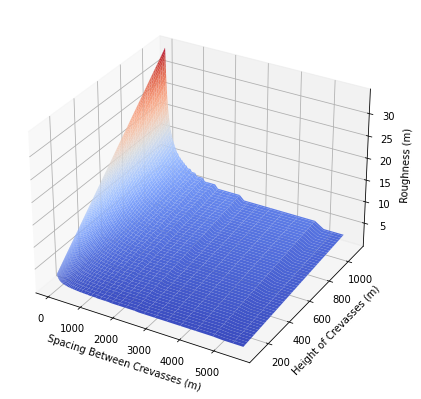

In [8]:
#3d plot of above data
fig,ax = plt.subplots(1,1,figsize=(10,7),subplot_kw={"projection": "3d"})
x,y = np.meshgrid(s_c_range, h_i_range)
ax.plot_surface(x,y,r_values,cmap=cm.coolwarm,antialiased = True)
ax.set_xlabel('Spacing Between Crevasses (m)')
ax.set_ylabel('Height of Crevasses (m)')
ax.set_zlabel('Roughness (m)')

In [ ]:
#h_i held constant (everything after this is various testing, no results from here used in research)

d = np.arange(1,5000,1)
h_i = 500
s_c_range = np.arange(500,1000,10)
w_c_range = np.arange(0,50,1)
r_values = np.zeros((len(s_c_range),len(w_c_range)))

for i,s_c in enumerate(s_c_range):
    for j,w_c in enumerate(w_c_range):
        v = make_surface_rift(h_i,w_c,s_c,d)
        r,psd,k = get_roughness(v,d,[0,1000])
        r_values[i,j] = r

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(10,7))
ax[0].set_title("Sensitivity of roughness to crevasse geometry",fontsize=15)
extent = [w_c_range[0],w_c_range[-1],s_c_range[0],s_c_range[-1]]
cplot = ax[0].imshow(r_values, extent=extent, aspect='auto', origin = 'lower')
#plt.colorbar(cplot,fraction=0.03, pad=0.04)
ax[0].set_xlabel("Crevasse width (m)")
ax[0].set_ylabel("Crevasse spacing (m)")

# plot some specific lines
spacing = s_c_range[4]
width = w_c_range[40]
ax[0].vlines(width,s_c_range[0],s_c_range[-1],colors='cyan',linestyle="--")
ax[0].hlines(spacing,w_c_range[0],w_c_range[-1],colors='r',linestyle="--")
ax[1].plot(w_c_range,r_values[np.where(w_c_range == width)[0][0],:],c='r',linestyle="--")
ax[2].plot(s_c_range,r_values[:,np.where(s_c_range == spacing)[0][0]],c='cyan',linestyle="--")
plt.tight_layout()

Roughness increases logarithmically as width increases
Roughness decreases exponentially as spacing increases
Roughness increases linearly as crevasse depth increases

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,7),subplot_kw={"projection": "3d"})
x,y = np.meshgrid(w_c_range, s_c_range)
ax.plot_surface(x,y,r_values,cmap=cm.coolwarm,antialiased = True)

# add colorbar

In [ ]:
#s_c held constant
d = np.arange(1,5000,1)
h_i_range = np.arange(0,1000,10)
s_c = 1000
w_c_range = np.arange(0,50,1)
r_values = np.zeros((len(h_i_range),len(w_c_range)))

for i,h_i in enumerate(h_i_range):
    for j,w_c in enumerate(w_c_range):
        v = make_surface_rift(h_i,w_c,s_c,d)
        r,psd,k = get_roughness(v,d,[0,1000])
        r_values[i,j] = r

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(10,7))
ax[0].set_title("Sensitivity of roughness to crevasse geometry",fontsize=15)
extent = [w_c_range[0],w_c_range[-1],h_i_range[0],h_i_range[-1]]
cplot = ax[0].imshow(r_values, origin='lower', extent=extent,aspect="auto")
#plt.colorbar(cplot,fraction=0.03, pad=0.04)
ax[0].set_xlabel("Crevasse width (m)")
ax[0].set_ylabel("Ice shelf height (m)")

# plot some specific lines
width = w_c_range[10]
depth = h_i_range[10]
ax[0].vlines(width,h_i_range[0],h_i_range[-1],colors='cyan',linestyle="--")
ax[0].hlines(depth,w_c_range[0],w_c_range[-1],colors='r',linestyle="--")
ax[1].plot(h_i_range,r_values[:,np.where(w_c_range == width)[0][0]],c='cyan',linestyle="--")
ax[2].plot(w_c_range,r_values[np.where(h_i_range == depth)[0][0],:],c='r',linestyle="--")
plt.tight_layout()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,7),subplot_kw={"projection": "3d"})
x,y = np.meshgrid(w_c_range, h_i_range)
ax.plot_surface(x,y,r_values,cmap=cm.coolwarm,antialiased = True)

# add colorbar

In [ ]:
d = np.arange(0,5000,1)
h_i_range = np.arange(0,1000,10)
w_c_range = np.arange(0,100,1)
r_values = np.zeros((len(h_i_range),len(w_c_range)))

for i,h_i in enumerate(h_i_range):
    for j,w_c in enumerate(w_c_range):
        v = make_single_rift(h_i,w_c,d)
        r,psd,k = get_roughness(v,d,[0,1000])
        r_values[i,j] = r

In [ ]:
fig,ax = plt.subplots(3,1,figsize=(10,7))
ax[0].set_title("Sensitivity of roughness to crevasse geometry",fontsize=15)
extent = [w_c_range[0],w_c_range[-1],h_i_range[0],h_i_range[-1]]
cplot = ax[0].imshow(r_values, origin='lower', extent=extent,aspect="auto")
#plt.colorbar(cplot,fraction=0.03, pad=0.04)
ax[0].set_xlabel("Crevasse width (m)")
ax[0].set_ylabel("Ice shelf height (m)")

# plot some specific lines
width = w_c_range[10]
depth = h_i_range[10]
ax[0].vlines(width,h_i_range[0],h_i_range[-1],colors='cyan',linestyle="--")
ax[0].hlines(depth,w_c_range[0],w_c_range[-1],colors='r',linestyle="--")
ax[1].plot(h_i_range,r_values[:,np.where(w_c_range == width)[0][0]],c='r',linestyle="--")
ax[2].plot(w_c_range,r_values[np.where(h_i_range == depth)[0][0],:],c='cyan',linestyle="--")
plt.tight_layout()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,7),subplot_kw={"projection": "3d"})
x,y = np.meshgrid(w_c_range, h_i_range)
ax.plot_surface(x,y,r_values,cmap=cm.coolwarm,antialiased = True)

# add colorbar

In [ ]:
#describe with these plots what the range of the roughness parameter is

#new ranges: crevasse
##h_c = [10,500]
##w_c = [1,10]
##s_c = [20,500]

#rift
##h_i = [100,1000]
##w_c = [10,1000]
##s_c = [2000,5000]

#find parameters of maximum roughness, ie ratio between width and spacing

#look at analytical of distributions

#explore fringe cases with anti aliasing filter